In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

# Задание 1

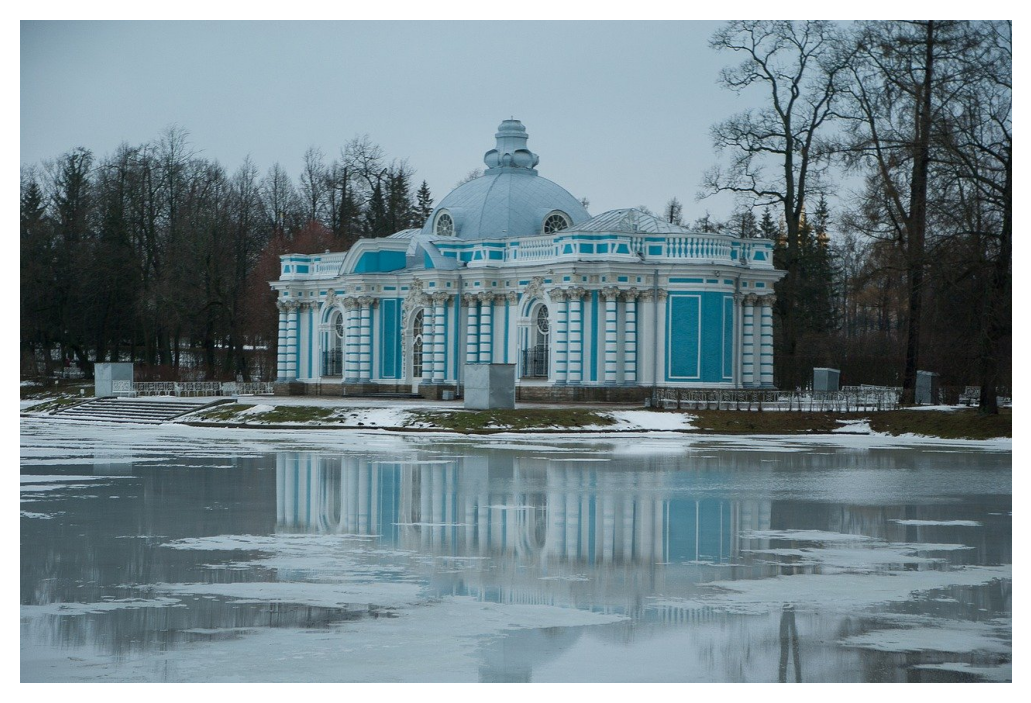

In [2]:
# 1. С помощью библиотеки OpenCV считайте изображение:

image = cv2.imread('/content/russia-1927758_1280.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  # Отключаем оси координат
plt.show()

In [3]:
# 2. Определите параметры изображения.

height, width, _ = image_rgb.shape
print('Высота изображения в пикселях', height)
print('Ширина изображения в пикселях', width)
print('Среднее значение интенсивности пикселя', image_rgb.mean())

Высота изображения в пикселях 856
Ширина изображения в пикселях 1280
Среднее значение интенсивности пикселя 121.34244974201714


In [4]:
# 3. Выполните преобразование экспозиции.

def exposure(image, p):
    return image.copy() * (2 ** p)

print('Cреднее значение интенсивности пикселя преобразованного изображения при p = -0.3', np.mean(exposure(image_rgb, 0.22)))
print('Cреднее значение интенсивности пикселя преобразованного изображения при p = 0.22', np.mean(exposure(image_rgb, -0.3)))

Cреднее значение интенсивности пикселя преобразованного изображения при p = -0.3 141.33162667888806
Cреднее значение интенсивности пикселя преобразованного изображения при p = 0.22 98.56069558268945


In [5]:
# 4. Выполните преобразование контрастности.

def contrast(image, p):
  img_result = image.copy() / 255.
  if (p > 0):
    img_result = (img_result - 0.5) / (1. - p)
  else:
    img_result = (img_result - 0.5) * (1. - p)
  for i in range(img_result.shape[0]):
      for j in range(img_result.shape[1]):
        for k in range(img_result.shape[2]):
          if img_result[i][j][k] > 1:
            img_result[i][j][k] = 1
          elif img_result[i][j][k] < 0:
            img_result[i][j][k] = 0
          img_result[i][j][k] = round(img_result[i][j][k] * 255., 0)
  img_result = img_result.astype(int)
  return img_result

img_1 = image_rgb.copy()
img_2 = image_rgb.copy()
print('Cреднее значение интенсивности пикселя преобразованного изображения при p = -0.3', np.mean(contrast(img_1, 0.22)))
print('Cреднее значение интенсивности пикселя преобразованного изображения при p = 0.22', np.mean(contrast(img_2, -0.3)))

Cреднее значение интенсивности пикселя преобразованного изображения при p = -0.3 26.585137388045172
Cреднее значение интенсивности пикселя преобразованного изображения при p = 0.22 26.956039780471183
